# Think Stats 2 Chapter 2: Histograms

Think Stats 2 was written by Allen B. Downey

Chapter 2: Working with survey data from the [National Survey of Family Growth (NSFG)](http://cdc.gov/nchs/nsfg.htm)

**The Question: Do first babies tend to be born late?**

In [1]:
import nsfg
import pandas as pd
import numpy as np

pd.options.display.max_rows = 400
pd.options.display.max_columns = 244

In [2]:
# ReadFemPreg takes the data files and returns a dataFrame
df = nsfg.ReadFemPreg()
df.sample(10, random_state=1)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,kidage,hpagelb,birthplc,paybirth1,paybirth2,paybirth3,knewpreg,trimestr,ltrimest,priorsmk,postsmks,npostsmk,getprena,bgnprena,pnctrim,lpnctri,workpreg,workborn,didwork,matweeks,weeksdk,matleave,matchfound,livehere,alivenow,cmkidied,cmkidlft,lastage,wherenow,legagree,parenend,anynurse,fedsolid,frsteatd_n,frsteatd_p,frsteatd,quitnurs,ageqtnur_n,ageqtnur_p,ageqtnur,matchfound2,livehere2,alivenow2,cmkidied2,cmkidlft2,lastage2,wherenow2,legagree2,parenend2,anynurse2,fedsolid2,frsteatd_n2,frsteatd_p2,frsteatd2,quitnurs2,ageqtnur_n2,ageqtnur_p2,ageqtnur2,matchfound3,livehere3,alivenow3,cmkidied3,cmkidlft3,lastage3,wherenow3,legagree3,parenend3,anynurse3,fedsolid3,frsteatd_n3,frsteatd_p3,frsteatd3,quitnurs3,ageqtnur_n3,ageqtnur_p3,ageqtnur3,cmlastlb,cmfstprg,cmlstprg,cmintstr,cmintfin,cmintstrop,cmintfinop,cmintstrcr,cmintfincr,evuseint,stopduse,whystopd,whatmeth01,whatmeth02,whatmeth03,whatmeth04,resnouse,wantbold,probbabe,cnfrmno,wantbld2,timingok,toosoon_n,toosoon_p,wthpart1,wthpart2,feelinpg,hpwnold,timokhp,cohpbeg,cohpend,tellfath,whentell,tryscale,wantscal,whyprg1,whyprg2,whynouse1,whynouse2,whynouse3,anyusint,prglngth,outcome,birthord,datend,agepreg,datecon,agecon,fmarout5,pmarpreg,rmarout6,fmarcon5,learnprg,pncarewk,paydeliv,lbw1,bfeedwks,maternlv,oldwantr,oldwantp,wantresp,wantpart,cmbirth,ager,agescrn,fmarital,rmarital,educat,hieduc,race,hispanic,hisprace,rcurpreg,pregnum,parity,insuranc,pubassis,poverty,laborfor,religion,metro,brnout,yrstrus,prglngth_i,outcome_i,birthord_i,datend_i,agepreg_i,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
6485,5885,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1218.0,NaN,1208.0,NaN,NaN,10.0,0.0,43.0,10.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1218.0,16.0,21.0,1.0,3.0,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1.0,3.0,NaN,NaN,1.0,5.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1218.0,1186.0,1218.0,1186.0,1218.0,1218.0,1234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,5,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,4.0,NaN,NaN,1,43,1,2.0,1218.0,20.41,1208,1958,1.0,2.0,1.0,1,2.0,3.0,4.0,2.0,995.0,3.0,5,5,5,5,973,21,21,1,1,9,5,2,2,2,2,2,2,3,1,128,7,3,3,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2064.778326,2179.151111,3065.411867,1,61,NaN,9.5000
11431,10510,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1093.0,NaN,1084.0,NaN,NaN,0.0,40.0,40.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,143.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,6.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1156.0,1093.0,1175.0,1057.0,1093.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,1,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,40,1,1.0,1093.0,16.83,1084,1608,1.0,2.0,1.0,5,NaN,NaN,NaN,2.0,26.0,NaN,2,2,2,2,891,28,28,1,1,12,9

Below we will be importing data into a dataFrame. 

**Throughout the chapter, we will be using the following columns**:
* **caseid** is the integer ID of the respondent.
* **prglngth** is the integer duration of the pregnancy in weeks.
* **outcome** is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
* **pregordr** is a pregnancy serial number; for example, the code for a respondent's first pregnancy is 1, for the second pregnancy is 2, and so on.
* **birthord** is a serial number for live births; the code for a respondent's first child is 1, and so on. For outcomes other than live birth, this field is blank.
* **birthwgt_lb** and **birthwgt_oz** contain the pounds and ounces parts of the birth weight of the baby.
* **agepreg** is the mother's age at the end of the pregnancy.
* **finalwgt** is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.

## 2.2: Representing Histograms

In [3]:
import thinkstats2
# get frequency of each item in given set
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [4]:
# see how many times a value appears
hist[2]

2

In [5]:
# look up a value that doesn't exist in the given set
hist[37]

0

In [6]:
# can also use the .Freq method to get this
hist.Freq(5)

1

In [7]:
# print all of the Values in the list 
# note these are the values being counted, not the counts themselves)
hist.Values()

dict_keys([1, 2, 3, 5])

In [8]:
# print count of frequencies for each value in the set
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


In [10]:
# do the same using the Items() method
# for val, freq in hist.Items():
#     print(val, freq)

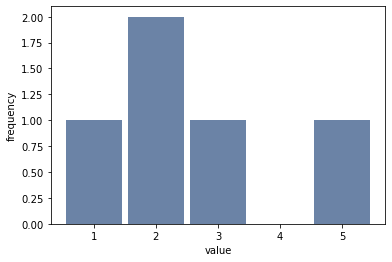

<Figure size 576x432 with 0 Axes>

In [11]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [14]:
# read data into dataFrame
preg = nsfg.ReadFemPreg()

# filter data to live births only
live = preg[preg.outcome == 1]
preg.sample(5)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,kidage,hpagelb,birthplc,paybirth1,paybirth2,paybirth3,knewpreg,trimestr,ltrimest,priorsmk,postsmks,npostsmk,getprena,bgnprena,pnctrim,lpnctri,workpreg,workborn,didwork,matweeks,weeksdk,matleave,matchfound,livehere,alivenow,cmkidied,cmkidlft,lastage,wherenow,legagree,parenend,anynurse,fedsolid,frsteatd_n,frsteatd_p,frsteatd,quitnurs,ageqtnur_n,ageqtnur_p,ageqtnur,matchfound2,livehere2,alivenow2,cmkidied2,cmkidlft2,lastage2,wherenow2,legagree2,parenend2,anynurse2,fedsolid2,frsteatd_n2,frsteatd_p2,frsteatd2,quitnurs2,ageqtnur_n2,ageqtnur_p2,ageqtnur2,matchfound3,livehere3,alivenow3,cmkidied3,cmkidlft3,lastage3,wherenow3,legagree3,parenend3,anynurse3,fedsolid3,frsteatd_n3,frsteatd_p3,frsteatd3,quitnurs3,ageqtnur_n3,ageqtnur_p3,ageqtnur3,cmlastlb,cmfstprg,cmlstprg,cmintstr,cmintfin,cmintstrop,cmintfinop,cmintstrcr,cmintfincr,evuseint,stopduse,whystopd,whatmeth01,whatmeth02,whatmeth03,whatmeth04,resnouse,wantbold,probbabe,cnfrmno,wantbld2,timingok,toosoon_n,toosoon_p,wthpart1,wthpart2,feelinpg,hpwnold,timokhp,cohpbeg,cohpend,tellfath,whentell,tryscale,wantscal,whyprg1,whyprg2,whynouse1,whynouse2,whynouse3,anyusint,prglngth,outcome,birthord,datend,agepreg,datecon,agecon,fmarout5,pmarpreg,rmarout6,fmarcon5,learnprg,pncarewk,paydeliv,lbw1,bfeedwks,maternlv,oldwantr,oldwantp,wantresp,wantpart,cmbirth,ager,agescrn,fmarital,rmarital,educat,hieduc,race,hispanic,hisprace,rcurpreg,pregnum,parity,insuranc,pubassis,poverty,laborfor,religion,metro,brnout,yrstrus,prglngth_i,outcome_i,birthord_i,datend_i,agepreg_i,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
6440,5834,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1178.0,NaN,1172.0,NaN,NaN,6.0,0.0,26.0,6.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1178.0,57.0,38.0,1.0,3.0,NaN,NaN,4.0,NaN,NaN,4.0,1.0,3.0,1.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,1178.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1211.0,1074.0,1211.0,1162.0,1178.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,1,2.0,5.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,26,1,3.0,1178.0,35.75,1172,3525,5.0,1.0,6.0,5,4.0,4.0,4.0,1.0,NaN,0.0,2,2,2,2,749,40,40,5,6,12,9,1,2,3,2,5,4,1,2,273,1,3,1,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1905.144182,2116.100697,2581.642850,1,31,NaN,1.875
3466,3078,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1111.0,2.0,1111.0,0.0,1109.0,NaN,23.0,99.0,99.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1201.0,1050.0,1201.0,1050.0,1111.0,NaN,NaN,NaN,NaN,1.0,5.0,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,5,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8,2,NaN,1111.0,21.00,1109,2083,5.0,1.0,6.0,5,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,859,31,31,4,5,12,9,2,1,1,2,3,1,

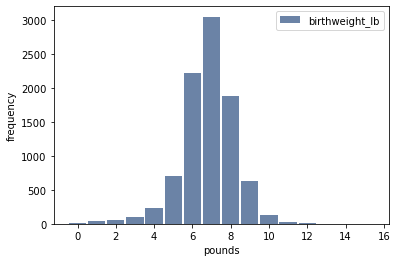

<Figure size 576x432 with 0 Axes>

In [15]:
# Make histogram for the baby weights of all live births (lb, oz)
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthweight_lb")

thinkplot.Hist(hist)

thinkplot.Show(xlabel='pounds', ylabel='frequency')

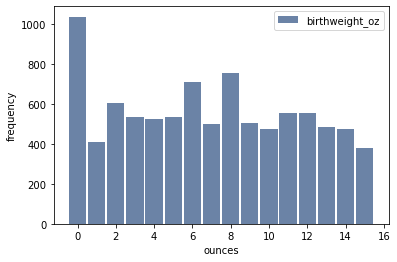

<Figure size 576x432 with 0 Axes>

In [16]:
hist = thinkstats2.Hist(live.birthwgt_oz, label="birthweight_oz")

thinkplot.Hist(hist)

thinkplot.Show(xlabel='ounces', ylabel='frequency')

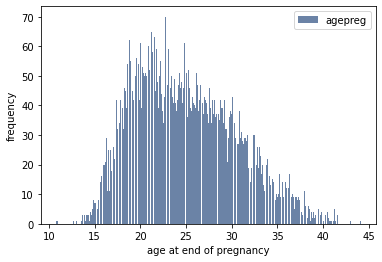

<Figure size 576x432 with 0 Axes>

In [22]:
hist = thinkstats2.Hist(live.agepreg, label="agepreg")

thinkplot.Hist(hist)

thinkplot.Show(xlabel='age at end of pregnancy', ylabel='frequency')

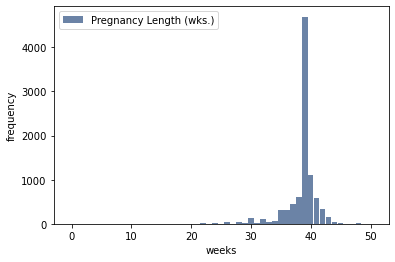

<Figure size 576x432 with 0 Axes>

In [21]:
hist = thinkstats2.Hist(live.prglngth, label="Pregnancy Length (wks.)")

thinkplot.Hist(hist)

thinkplot.Show(xlabel='weeks', ylabel='frequency')